# Data Analytics Intermediate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("vending_machine_sales_.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'vending_machine_sales_.csv'

In [5]:
df.head()

,Location,Machine,Product,Category,MPrice,MQty,LineTotal,TransTotal
0,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,3.5,1,3.5,3.5
1,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,3.5,1,3.5,5.0
2,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1.5,1,1.5,5.0
3,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,1.5,1,1.5,1.5
4,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,3.5,1,3.5,3.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9617 entries, 0 to 9616
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    9617 non-null   object 
 1   Machine     9617 non-null   object 
 2   Product     9611 non-null   object 
 3   Category    9350 non-null   object 
 4   MPrice      9614 non-null   float64
 5   MQty        9617 non-null   int64  
 6   LineTotal   9617 non-null   float64
 7   TransTotal  9617 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 601.2+ KB


In [7]:
df.describe()

,MPrice,MQty,LineTotal,TransTotal
count,9614.000000,9617.000000,9617.000000,9617.000000
mean,1.958394,1.014766,1.985520,2.220469
std,0.698670,0.127330,0.744244,1.084523
min,1.000000,1.000000,1.000000,1.000000
25%,1.500000,1.000000,1.500000,1.500000
50%,1.500000,1.000000,1.500000,2.000000
75%,2.500000,1.000000,2.500000,2.750000
max,5.000000,3.000000,8.000000,9.000000


In [8]:
df["Location"].unique()

array(['Brunswick Sq Mall', 'Earle Asphalt', 'GuttenPlans',
       'EB Public Library'], dtype=object)

In [9]:
df["Location"].nunique()

4

In [11]:
for col in df.columns:
    print(col)

Location
Machine
Product
Category
MPrice
MQty
LineTotal
TransTotal


In [10]:
for col in df.columns:
    print(f"{col} has {df[col].nunique()} unique values.")
    print(df[col].unique())
    print()

Location has 4 unique values.
['Brunswick Sq Mall' 'Earle Asphalt' 'GuttenPlans' 'EB Public Library']

Machine has 5 unique values.
['BSQ Mall x1366 - ATT' 'BSQ Mall x1364 - Zales' 'Earle Asphalt x1371'
 'GuttenPlans x1367' 'EB Public Library x1380']

Product has 184 unique values.
['Red Bull - Energy Drink - Sugar Free' 'Takis - Hot Chilli Pepper & Lime'
 'Bai Antioxidant - Brasilia BB'
 "Miss Vickie's Potato Chip - Sea Salt & Vinega"
 "Miss Vickie's Potato Chip - Lime & Cracked Pe" 'Monster Energy Original'
 'Seapoint Farms Dry Roasted Edamame - Wasabi' 'Snapple Diet Tea - Lemon'
 'Skinny Pop Popcorn' 'Stretch Island Fruit Leathers Snacks - Variet'
 'KitKat - Crisp Wafers' 'Wonderful Pistachios - Variety'
 'Spindrift - Sparkling Water  Lime'
 "Miss Vickie's Potato Chip - Sea Salt Original"
 'Jacks Links Bar Beef Strip' 'Vitamin Water - XXX Acai BB Pomegranate'
 'Cheetos - Fleming Hot Crunchy'
 'Pure Organic Fruit Bar - Strawberry Banana' 'Oreo Mini'
 'Nutter Butter Bites' 'Jack Links

## How value_counts(), groupby() and sns.countplot() are all closely related!

In [12]:
# groupby operation is a cornerstone in data analytics as it allows us to summarize data across categories.

# The most simple form of a groupby operations is to count the number of unique categories,
# yesterday we learned how to do this with value_counts()

df["Location"].value_counts()

Location
GuttenPlans          3664
EB Public Library    3180
Brunswick Sq Mall    1739
Earle Asphalt        1034
Name: count, dtype: int64

In [13]:
df["Machine"].value_counts()

Machine
GuttenPlans x1367          3664
EB Public Library x1380    3180
Earle Asphalt x1371        1034
BSQ Mall x1364 - Zales      940
BSQ Mall x1366 - ATT        799
Name: count, dtype: int64

In [15]:
df["Category"].value_counts()

Category
Food              5293
Carbonated        2377
Non Carbonated    1023
Water              657
Name: count, dtype: int64

In [14]:
df.groupby("Category")["Category"].count()

Category
Carbonated        2377
Food              5293
Non Carbonated    1023
Water              657
Name: Category, dtype: int64

Text(0.5, 1.0, 'Count of categories')

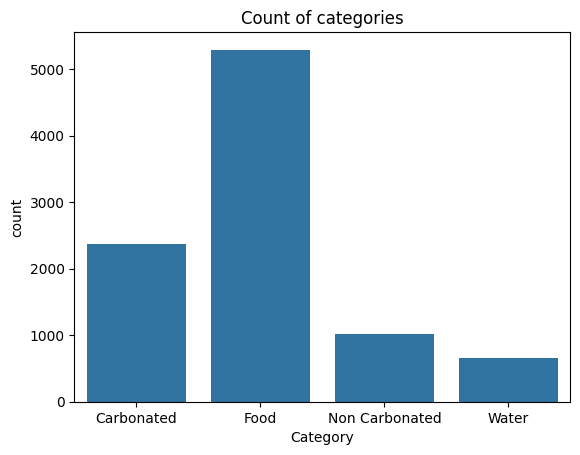

In [19]:
sns.countplot(data=df, x="Category")
plt.title("Count of categories")
#plt.show()

In [20]:
df.nunique()

Location        4
Machine         5
Product       184
Category        4
MPrice         15
MQty            3
LineTotal      20
TransTotal     31
dtype: int64

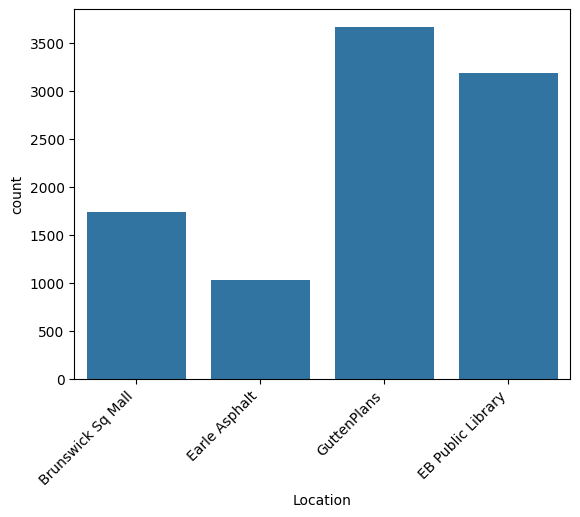

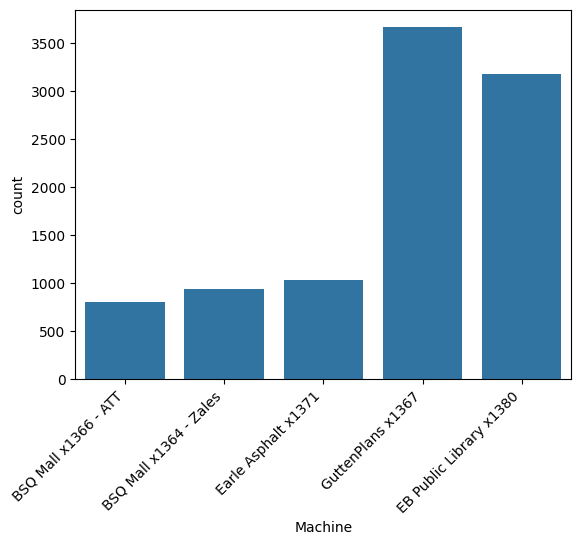

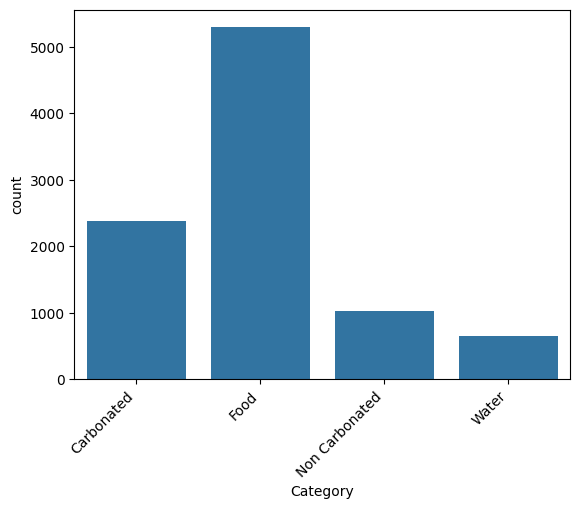

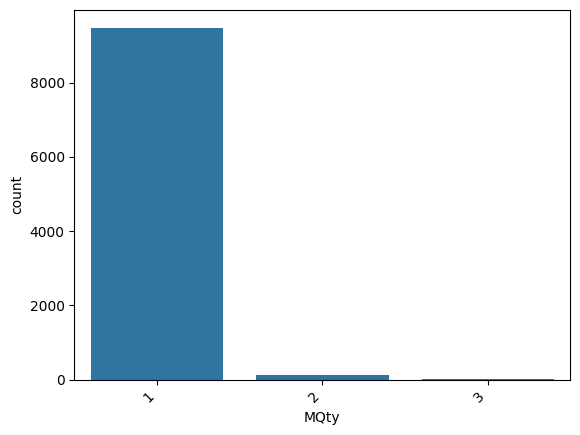

In [25]:
for col in ["Location", "Machine", "Category", "MQty"]:
    ax = sns.countplot(data=df, x=col)
    ax.set_xticks(range(df[col].nunique()))
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right")
    plt.show()

## Groupby() using different aggregation methods

In [26]:
df.groupby("Location")["TransTotal"].sum()

Location
Brunswick Sq Mall    3708.00
EB Public Library    7744.00
Earle Asphalt        1956.50
GuttenPlans          7945.75
Name: TransTotal, dtype: float64

In [27]:
df.groupby("Location")["TransTotal"].mean()

Location
Brunswick Sq Mall    2.132260
EB Public Library    2.435220
Earle Asphalt        1.892166
GuttenPlans          2.168600
Name: TransTotal, dtype: float64

In [28]:
df.groupby("Location")["TransTotal"].median()

Location
Brunswick Sq Mall    2.00
EB Public Library    2.00
Earle Asphalt        1.75
GuttenPlans          1.50
Name: TransTotal, dtype: float64

In [31]:
df.groupby("Location")["TransTotal"].agg(["min","max", "median", "mean", "sum", "var", "std", "sem"])

,min,max,median,mean,sum,var,std,sem
Location,,,,,,,,
Brunswick Sq Mall,1.00,7.0,2.00,2.132260,3708.00,0.859943,0.927331,0.022237
EB Public Library,1.00,9.0,2.00,2.435220,7744.00,1.521243,1.233387,0.021872
Earle Asphalt,1.25,5.5,1.75,1.892166,1956.50,0.326575,0.571467,0.017772
GuttenPlans,1.00,7.0,1.50,2.168600,7945.75,1.190495,1.091098,0.018025


In [30]:
df.groupby("Location")["TransTotal"].describe()

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Brunswick Sq Mall,1739.0,2.132260,0.927331,1.00,1.5,2.00,2.5,7.0
EB Public Library,3180.0,2.435220,1.233387,1.00,1.5,2.00,3.0,9.0
Earle Asphalt,1034.0,1.892166,0.571467,1.25,1.5,1.75,2.0,5.5
GuttenPlans,3664.0,2.168600,1.091098,1.00,1.5,1.50,3.0,7.0


In [33]:
df.groupby("Machine")[["TransTotal", "MQty"]].agg(["min","max", "mean", "median"])

TransTotal                       MQty                \
                               min  max      mean median  min max      mean   
Machine                                                                       
BSQ Mall x1364 - Zales        1.00  7.0  2.021277   1.50    1   3  1.038298   
BSQ Mall x1366 - ATT          1.25  7.0  2.262829   2.00    1   3  1.027534   
EB Public Library x1380       1.00  9.0  2.435220   2.00    1   3  1.014151   
Earle Asphalt x1371           1.25  5.5  1.892166   1.75    1   2  1.005803   
GuttenPlans x1367             1.00  7.0  2.168600   1.50    1   3  1.009007   

                                
                        median  
Machine                         
BSQ Mall x1364 - Zales     1.0  
BSQ Mall x1366 - ATT       1.0  
EB Public Library x1380    1.0  
Earle Asphalt x1371        1.0  
GuttenPlans x1367          1.0

## Groupby() with cat & num col is related to sns.barplot()

In [35]:
df.groupby("Location")["TransTotal"].mean()

Location
Brunswick Sq Mall    2.132260
EB Public Library    2.435220
Earle Asphalt        1.892166
GuttenPlans          2.168600
Name: TransTotal, dtype: float64

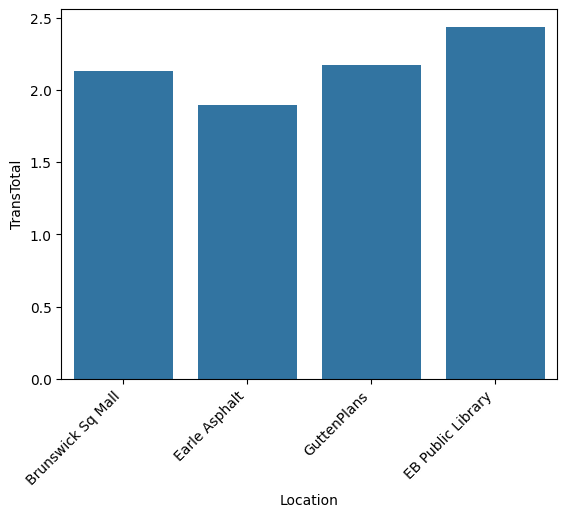

In [38]:
ax = sns.barplot(data=df, x="Location", y="TransTotal", estimator="mean", errorbar=None)
ax.set_xticks(range(df["Location"].nunique()))
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Double Groupby Operations

In [44]:
df.groupby(["Location", "Category"])["TransTotal"].sum().to_frame()

TransTotal
Location          Category                  
Brunswick Sq Mall Carbonated          719.00
                  Food               1493.00
                  Non Carbonated      627.75
                  Water               698.25
EB Public Library Carbonated         1152.75
                  Food               4287.00
                  Non Carbonated     1202.00
                  Water               598.75
Earle Asphalt     Carbonated          152.00
                  Food               1647.00
                  Non Carbonated       91.00
                  Water                46.50
GuttenPlans       Carbonated         3267.00
                  Food               3511.50
                  Non Carbonated     1018.00

In [47]:
df.groupby(["Location", "Category"])["TransTotal"].sum().to_frame().unstack()

TransTotal                               
Category          Carbonated    Food Non Carbonated   Water
Location                                                   
Brunswick Sq Mall     719.00  1493.0         627.75  698.25
EB Public Library    1152.75  4287.0        1202.00  598.75
Earle Asphalt         152.00  1647.0          91.00   46.50
GuttenPlans          3267.00  3511.5        1018.00     NaN

In [49]:
pivot_table = df.pivot_table(values="TransTotal",
    index="Location",
    columns="Category",
    aggfunc="sum")

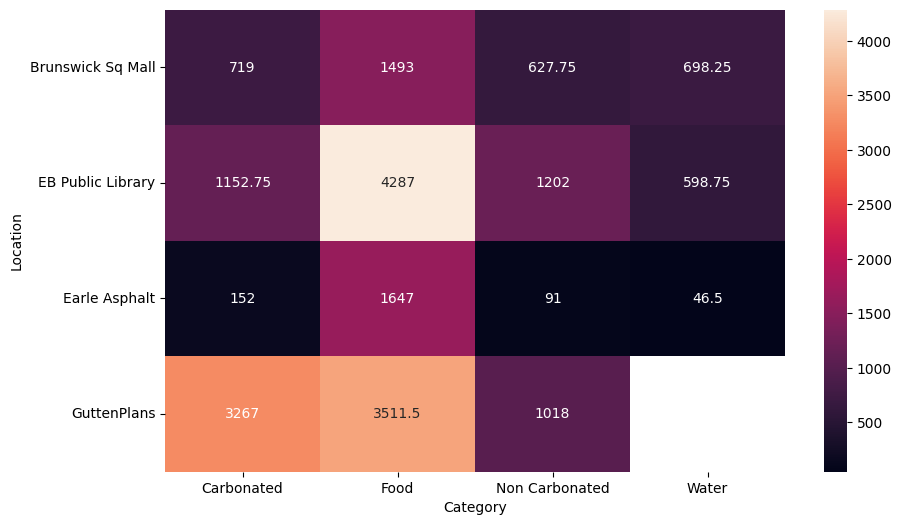

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt="g")
plt.show()

In [60]:
pivot_table

Category,Carbonated,Food,Non Carbonated,Water
Location,,,,
Brunswick Sq Mall,719.00,1493.0,627.75,698.25
EB Public Library,1152.75,4287.0,1202.00,598.75
Earle Asphalt,152.00,1647.0,91.00,46.50
GuttenPlans,3267.00,3511.5,1018.00,NaN


In [59]:
pivot_table.to_html("pivoted.html")

## Double Groupby with sns.barplot()

In [61]:
df.groupby(["Location", "Category"])[["TransTotal"]].sum()

TransTotal
Location          Category                  
Brunswick Sq Mall Carbonated          719.00
                  Food               1493.00
                  Non Carbonated      627.75
                  Water               698.25
EB Public Library Carbonated         1152.75
                  Food               4287.00
                  Non Carbonated     1202.00
                  Water               598.75
Earle Asphalt     Carbonated          152.00
                  Food               1647.00
                  Non Carbonated       91.00
                  Water                46.50
GuttenPlans       Carbonated         3267.00
                  Food               3511.50
                  Non Carbonated     1018.00

<Axes: xlabel='Location', ylabel='TransTotal'>

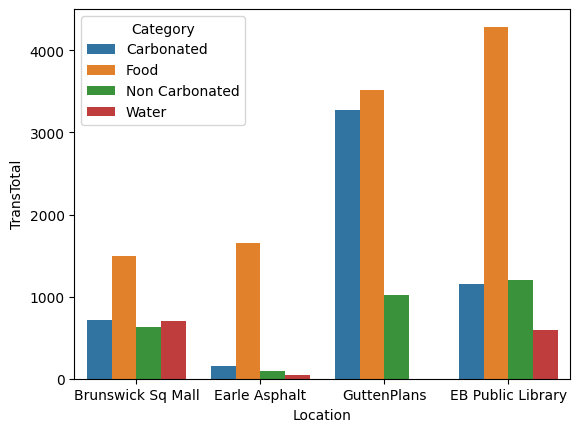

In [63]:
sns.barplot(data=df, x="Location", y="TransTotal", estimator="sum", hue="Category", errorbar=None)

## Lineplots

In [65]:
disorders = pd.read_csv("disorders.csv")

In [68]:
disorders#.head()

,Year,Anxiety,Anorexia,ADHD,Bipolar,Depression,Schizophrenia,Substance Abuse
0,2008,10.4,1.2,3.6,1.4,10.2,0.3,1.1
1,2009,10.5,1.0,3.7,1.3,10.1,0.3,1.1
2,2010,10.4,0.9,3.9,1.4,9.7,0.3,1.2
3,2011,11.6,0.9,4.6,1.4,10.7,0.2,1.1
4,2012,11.9,1.0,4.5,1.5,10.9,0.3,1.1
5,2013,12.9,1.1,5.1,1.5,11.0,0.3,1.2
6,2014,14.3,1.1,5.3,1.5,12.0,0.3,1.0
7,2015,15.8,1.3,5.4,1.5,13.1,0.3,1.0
8,2016,17.0,1.3,5.1,1.7,13.9,0.3,1.1
9,2017,20.6,1.7,6.5,1.7,16.7,0.4,1.2


<Axes: xlabel='Year', ylabel='Anxiety'>

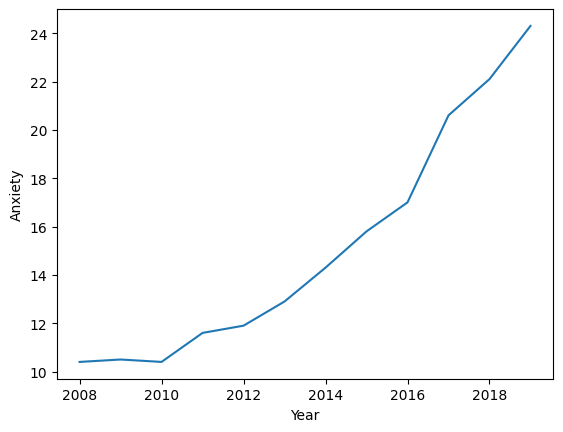

In [69]:
sns.lineplot(data=disorders, x="Year", y="Anxiety")

Text(0, 0.5, 'Percentage')

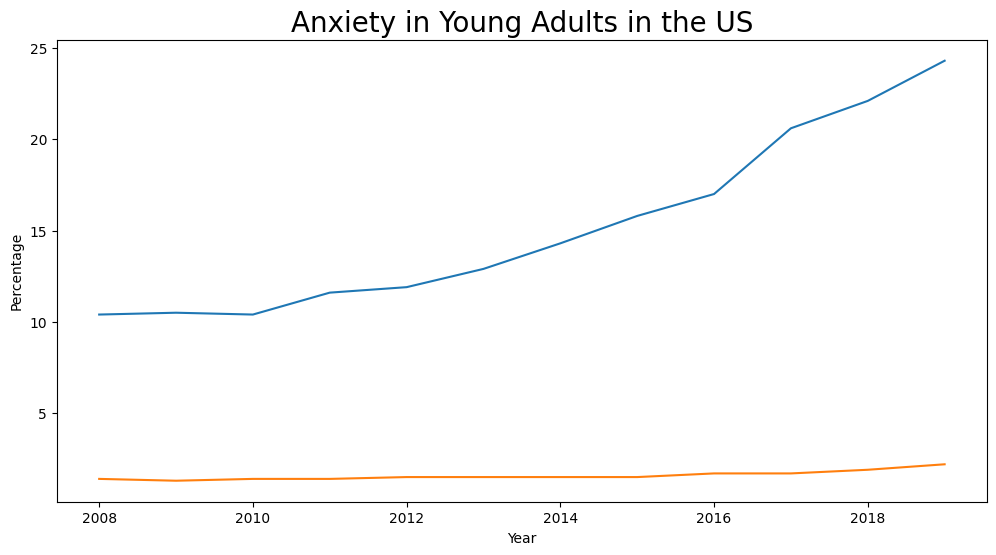

In [74]:
fig = plt.figure(figsize=(12,6))
sns.lineplot(data=disorders, x="Year", y="Anxiety")
sns.lineplot(data=disorders, x="Year", y="Bipolar")
plt.title("Anxiety in Young Adults in the US", fontsize=20)
plt.xlabel("Year")
plt.ylabel("Percentage")
#plt.show()

In [73]:
fig.savefig("anxiety_graph.png", transparent=True)

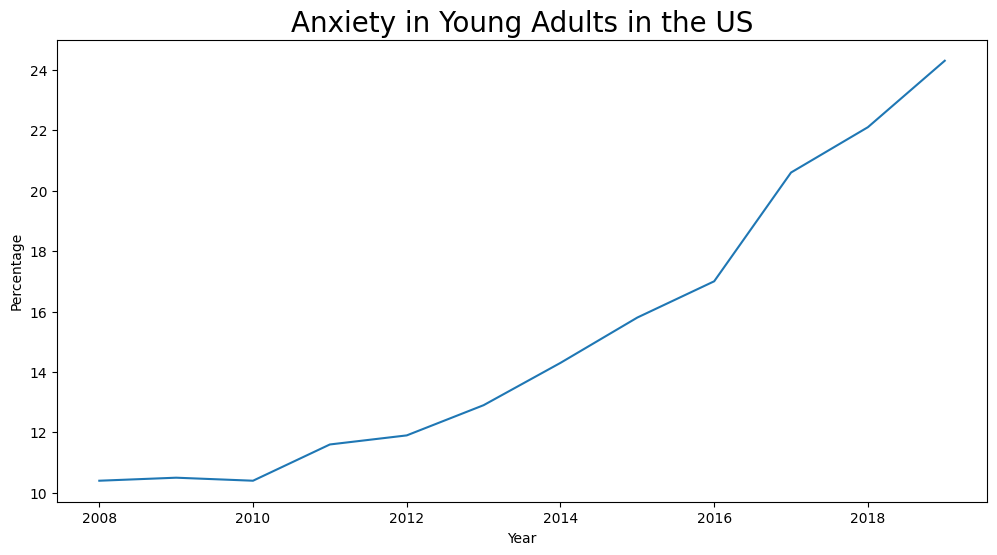

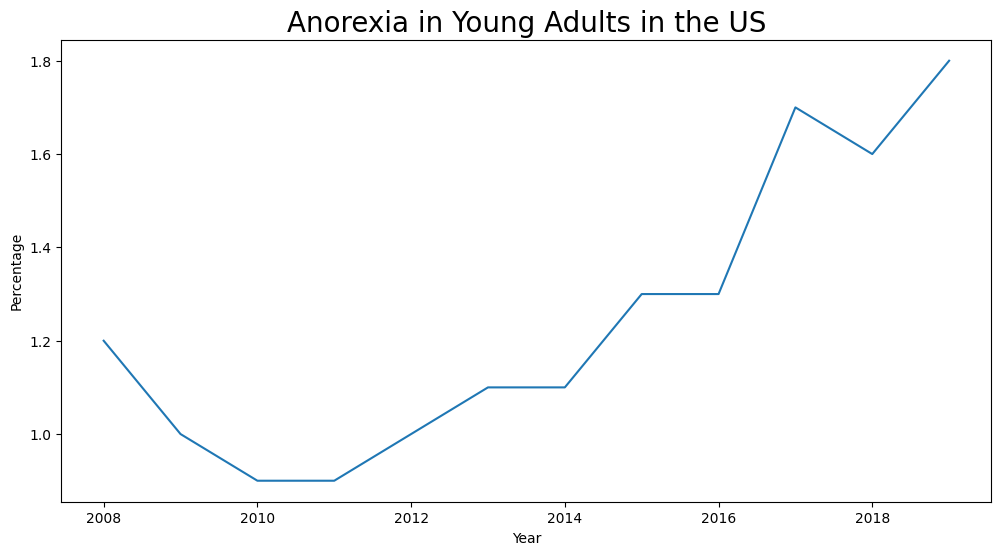

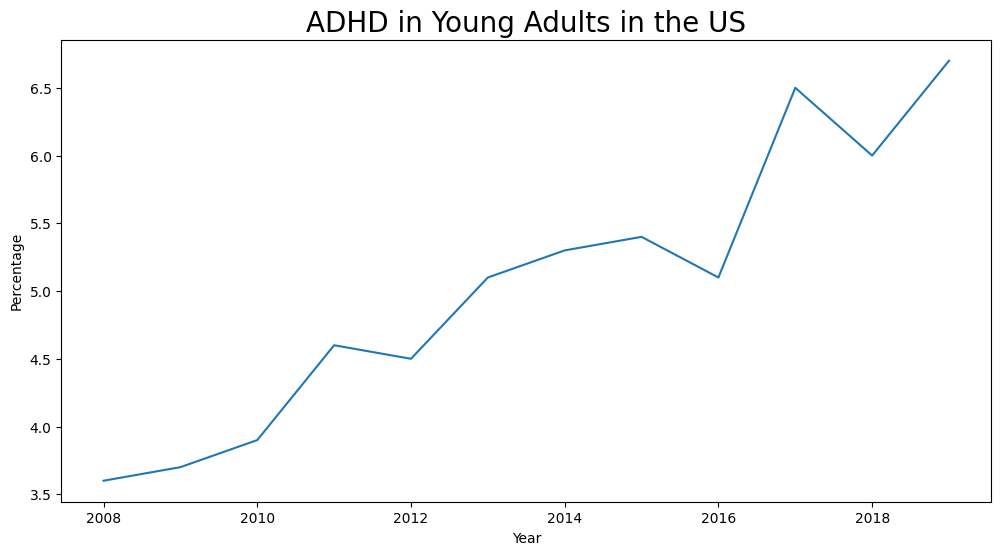

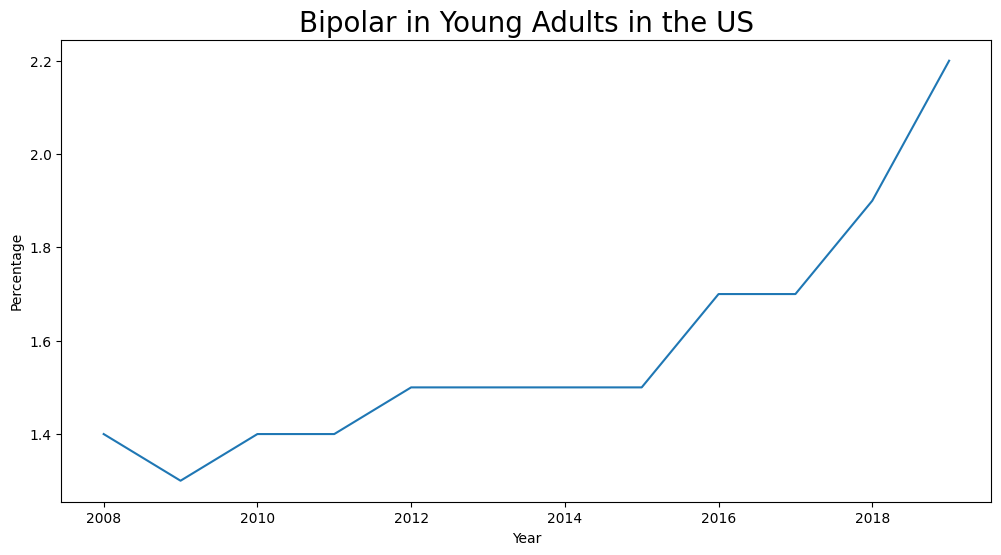

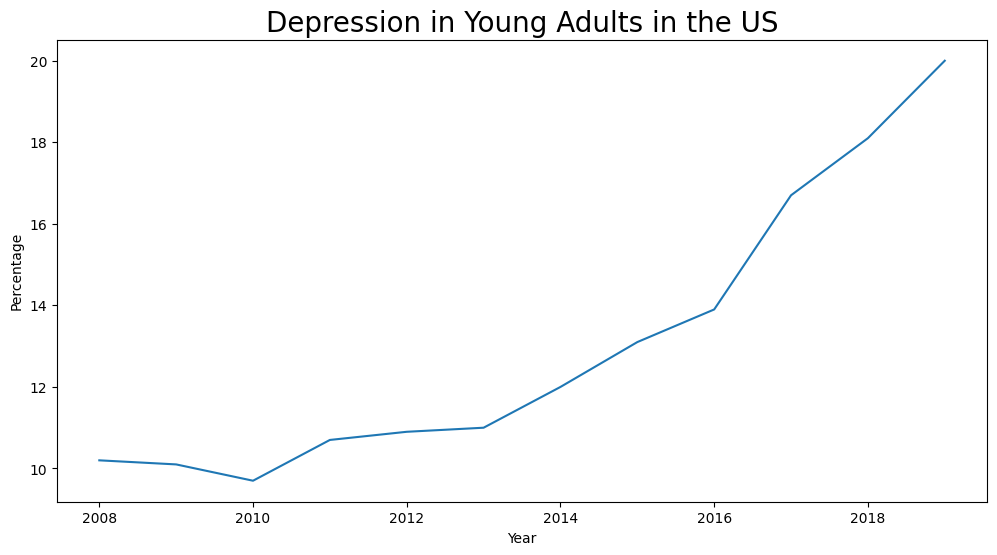

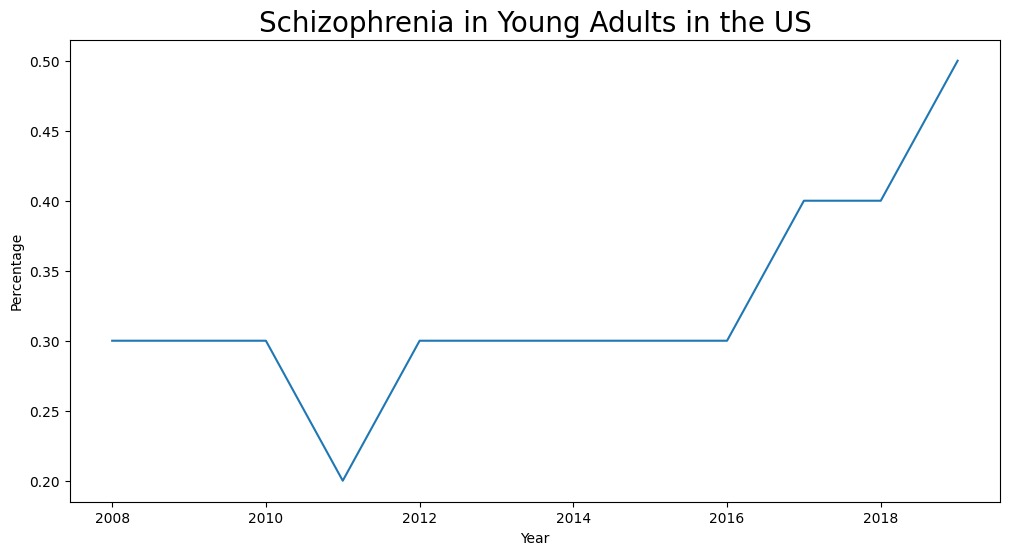

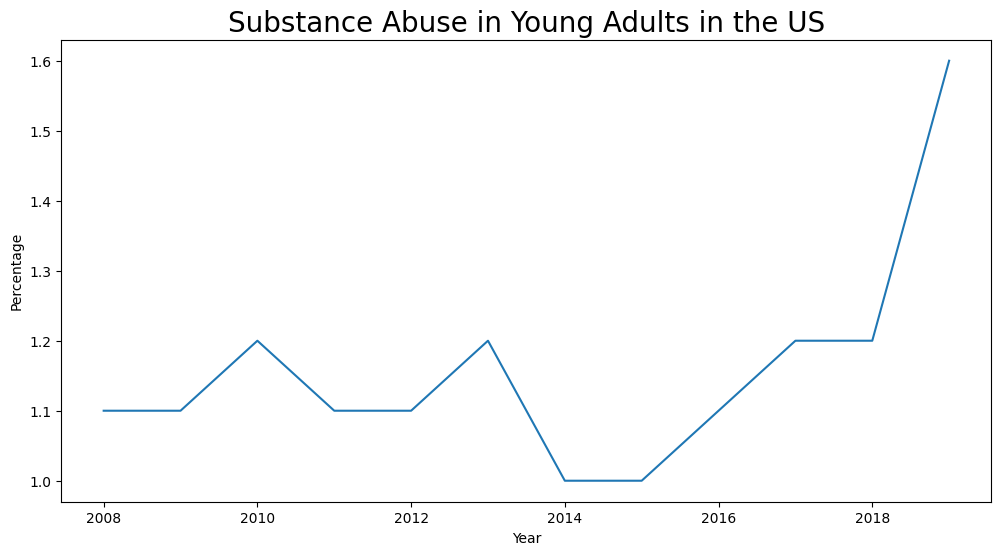

In [76]:
for col in disorders.columns[1:]:
    fig = plt.figure(figsize=(12,6))
    sns.lineplot(data=disorders, x="Year", y=col)
    plt.title(f"{col} in Young Adults in the US", fontsize=20)
    plt.xlabel("Year")
    plt.ylabel("Percentage")
    plt.show()

In [80]:
disorders

,Year,Anxiety,Anorexia,ADHD,Bipolar,Depression,Schizophrenia,Substance Abuse
0,2008,10.4,1.2,3.6,1.4,10.2,0.3,1.1
1,2009,10.5,1.0,3.7,1.3,10.1,0.3,1.1
2,2010,10.4,0.9,3.9,1.4,9.7,0.3,1.2
3,2011,11.6,0.9,4.6,1.4,10.7,0.2,1.1
4,2012,11.9,1.0,4.5,1.5,10.9,0.3,1.1
5,2013,12.9,1.1,5.1,1.5,11.0,0.3,1.2
6,2014,14.3,1.1,5.3,1.5,12.0,0.3,1.0
7,2015,15.8,1.3,5.4,1.5,13.1,0.3,1.0
8,2016,17.0,1.3,5.1,1.7,13.9,0.3,1.1
9,2017,20.6,1.7,6.5,1.7,16.7,0.4,1.2


In [81]:
# melting dataframe to long format
disorders_melt = disorders.melt(id_vars="Year", var_name="Disorders", value_name="Percentage")

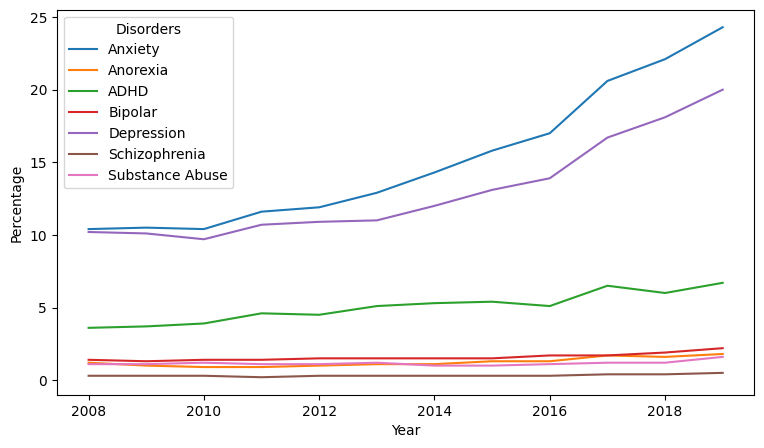

In [83]:
fig = plt.figure(figsize=(9,5))
sns.lineplot(data=disorders_melt, x="Year", y="Percentage", hue="Disorders")
plt.show()

# Plotting Distributions

In [84]:
df = pd.read_csv("blood_pressure.csv")

In [85]:
df

,patient,sex,agegrp,blood_pressure
0,1,Male,30-45,153
1,2,Male,30-45,170
2,3,Male,30-45,168
3,4,Male,30-45,142
4,5,Male,30-45,141
...,...,...,...,...
115,116,Female,60+,152
116,117,Female,60+,152
117,118,Female,60+,174
118,119,Female,60+,151


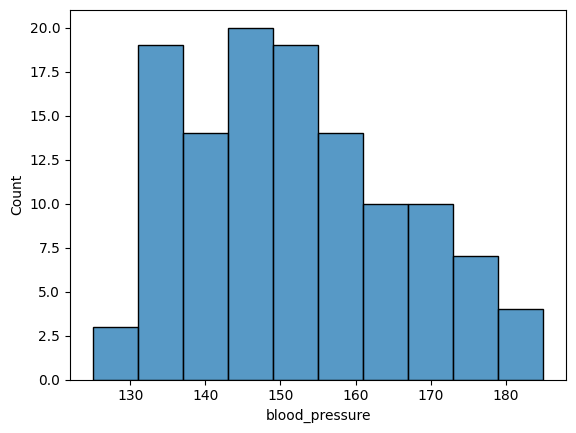

In [89]:
sns.histplot(data=df, x="blood_pressure", bins=10)
plt.show()

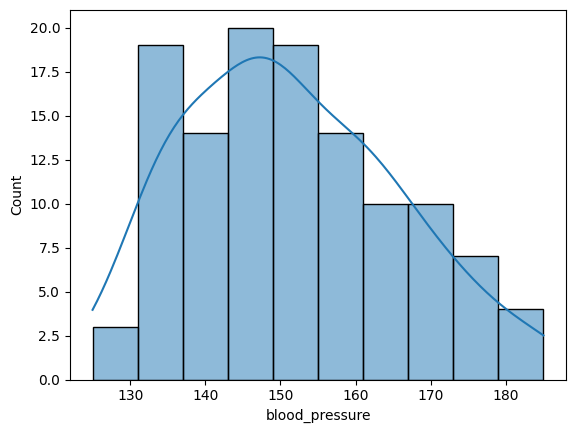

In [91]:
sns.histplot(data=df, x="blood_pressure", bins=10, kde=True)
plt.show()

<Axes: xlabel='blood_pressure', ylabel='Density'>

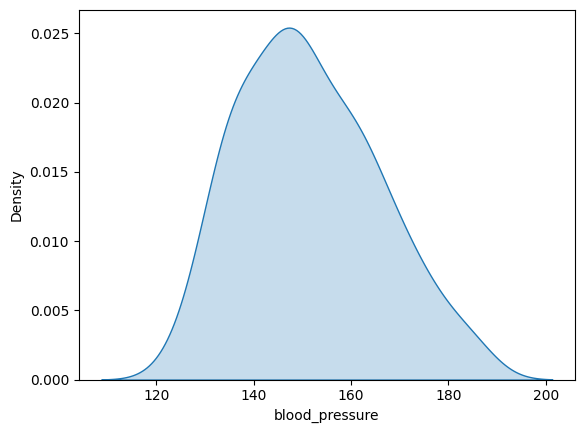

In [92]:
sns.kdeplot(data=df, x="blood_pressure", fill=True)

In [93]:
p='/Users/axelcajselius/Documents/GitHub/nod_coding_master/master/02_block/statistics/stats_pt2/03_anova_regression/regression/'

In [94]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [95]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [99]:
df.corr(numeric_only=True)["price"].sort_values(key=abs, ascending=False)[1:]

enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg         -0.697599
citympg            -0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID             -0.109093
peakrpm            -0.085267
symboling          -0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

In [100]:
df.corr(numeric_only=True)["price"].sort_values(key=abs, ascending=False)[1:].index

Index(['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg',
       'citympg', 'carlength', 'wheelbase', 'boreratio', 'carheight', 'car_ID',
       'peakrpm', 'symboling', 'stroke', 'compressionratio'],
      dtype='object')

<Axes: xlabel='enginesize', ylabel='price'>

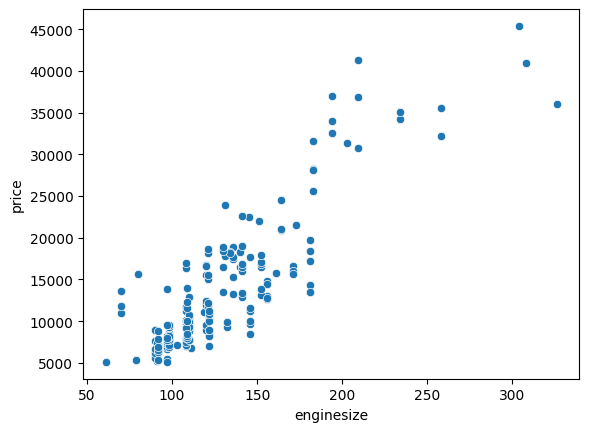

In [101]:
sns.scatterplot(data=df, x="enginesize", y="price")

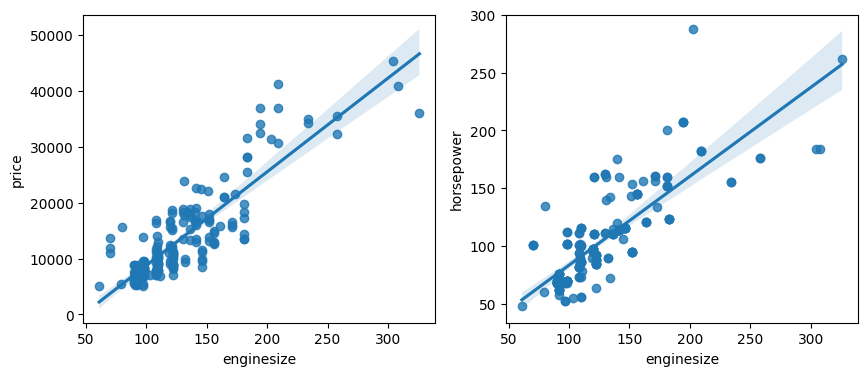

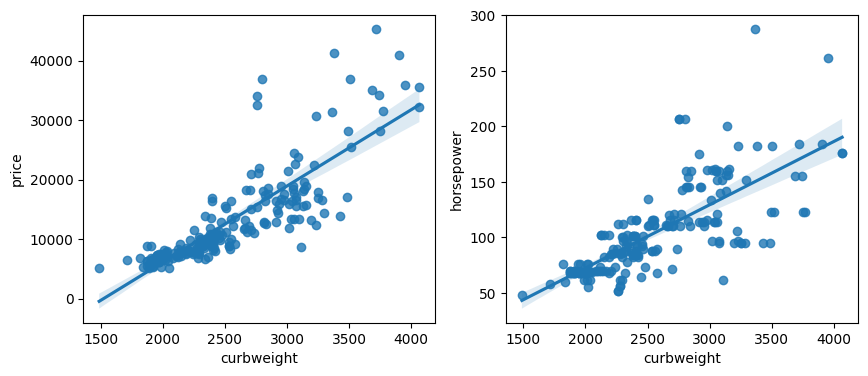

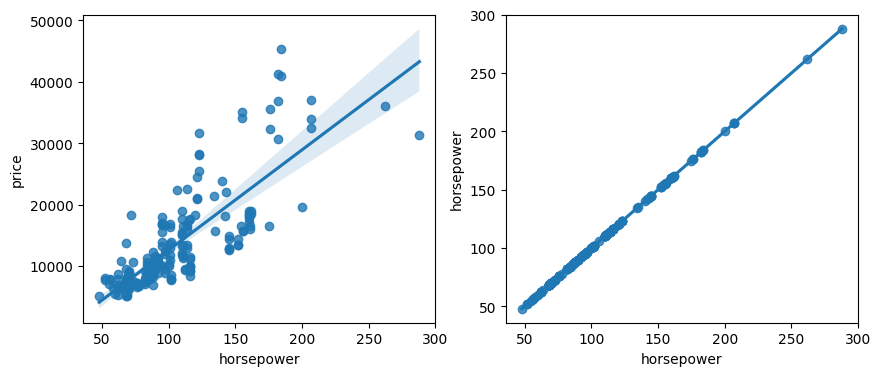

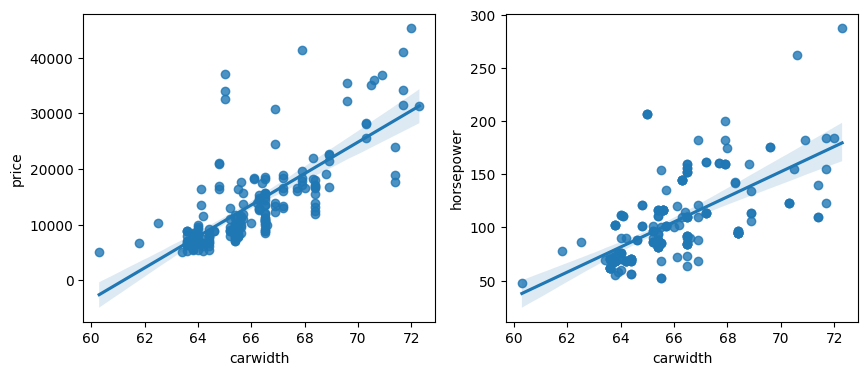

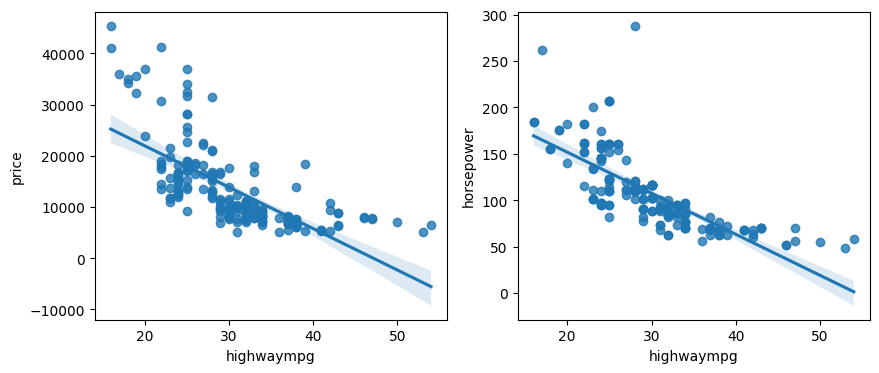

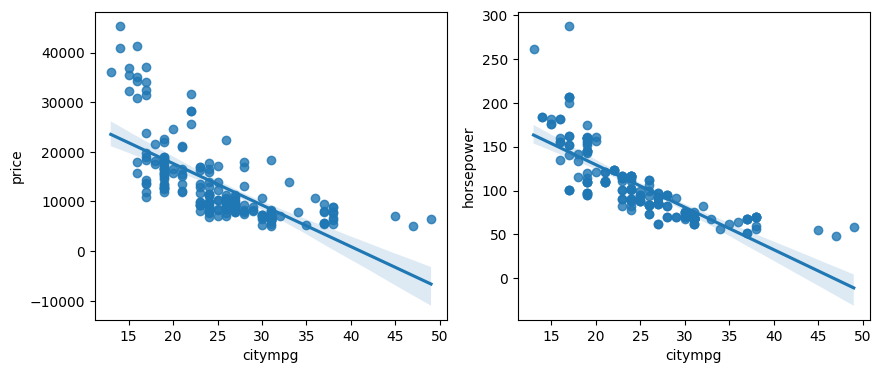

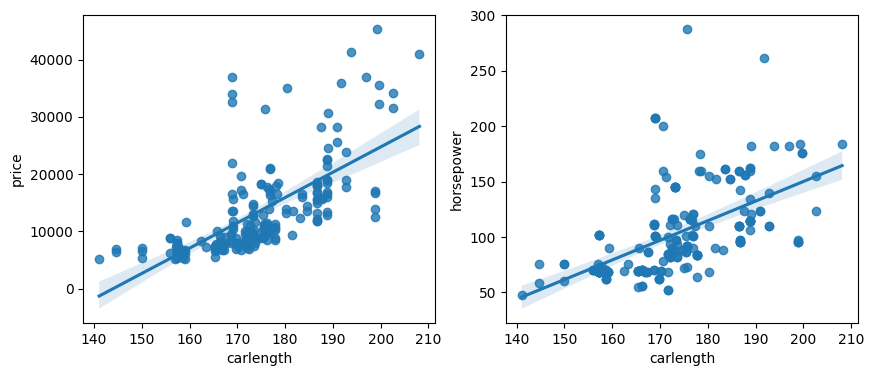

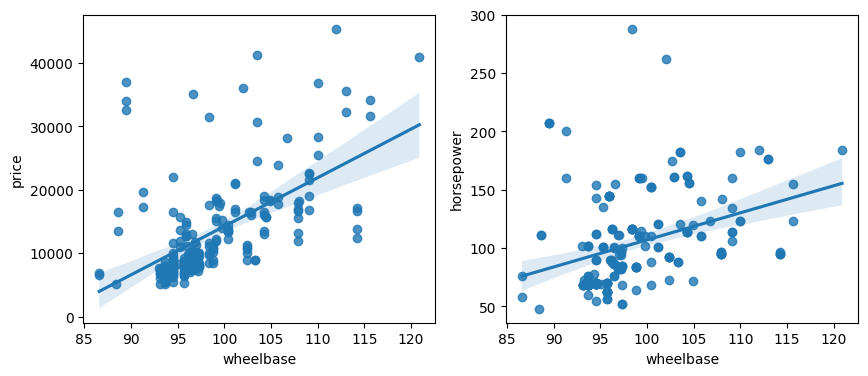

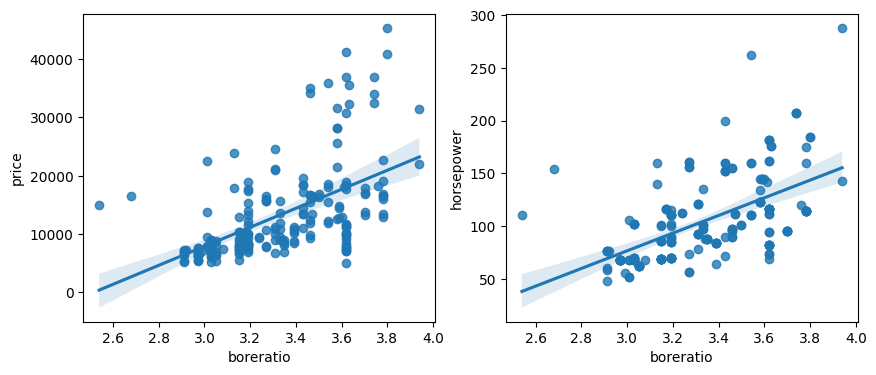

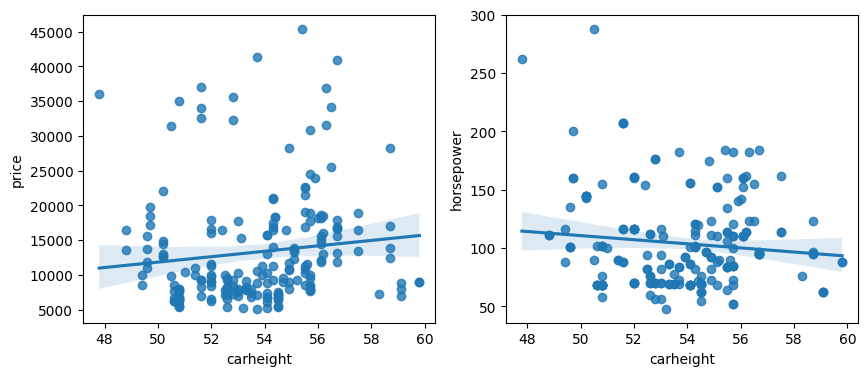

In [106]:
lst = ['enginesize', 'curbweight', 'horsepower', 'carwidth', 'highwaympg','citympg', 'carlength', 'wheelbase', 'boreratio', 'carheight']

for col in lst:
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    sns.regplot(x=col, y="price", data=df, ax=ax[0])
    sns.regplot(x=col, y="horsepower", data=df, ax=ax[1])
    plt.show()

In [ ]:
# numeric / categorical

# numeric: continuous data & discrete data

# categorical: nominal & ordinal